# CS445: Term Project

#### Victor Weeks & Josh Lutz

## Introduction

## Data

In [1]:
from gw2spidy import Gw2Spidy as spidy # allows retrieval of market information
import numpy as np
import json
import random
import neuralnetworksA4 as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
itemIDs = (19718,19720,19697,19680,19719,19738,19723,19710,
           19739,19740,19699,19683,19703,19687,19728,19733,19726,19713,
           19741,19742,19698,19682,19730,19734,19727,19714,
           19743,19744,19702,19686,19731,19736,19736,19724,19711,
           19748,19747,19700,19684,19729,19735,19722,19709,
           19745,19746,19701,19685,19732,19737,19725,19712)

In [105]:
itemTimeData = np.load('itemData.npy')
itemTimeData.shape

(18768, 13)

In [4]:
js = spidy.getItemData(19718)

In [5]:
gi = spidy.getItemData(19682)

In [6]:
hw = spidy.getItemData(19711)

In [7]:
bg = spidy.getItemData(19746)

In [8]:
compare1 = np.array([js['max_offer_unit_price'], js['min_sale_unit_price'], js['offer_availability'], js['sale_availability']])

In [9]:
compare2 = np.array([gi['max_offer_unit_price'], gi['min_sale_unit_price'], gi['offer_availability'], gi['sale_availability']])

In [10]:
compare3 = np.array([hw['max_offer_unit_price'], hw['min_sale_unit_price'], hw['offer_availability'], hw['sale_availability']])

In [11]:
compare4 = np.array([bg['max_offer_unit_price'], bg['min_sale_unit_price'], bg['offer_availability'], bg['sale_availability']])

In [12]:
predict1 = np.loadtxt('juteScrapPrediction.txt')
predict1 = np.array(predict1[1,0:4])

In [13]:
predict2 = np.loadtxt('goldIngotPrediction.txt')
predict2 = np.array(predict2[1,0:4])

In [14]:
predict3 = np.loadtxt('hardWoodPlankPrediction.txt')
predict3 = np.array(predict3[1,0:4])

In [15]:
predict4 = np.loadtxt('boltOfGossamerPrediction.txt')
predict4 = np.array(predict4[1,0:4])

In [16]:
np.array(compare1) - np.array(predict1[:4])

array([ -1.72514024e+00,  -5.09202506e-01,  -5.82799956e+03,
         1.55272227e+04])

In [17]:
np.array(compare2) - np.array(predict2[:4])

array([    2.15587967,    -7.80003924,  2091.0899428 ,  -393.61501639])

In [18]:
np.array(compare3) - np.array(predict3[:4])

array([   27.39075158,   -12.17233331,  -114.35896379,  1148.45745578])

In [19]:
np.array(compare4) - np.array(predict4[:4])

array([ -4.48409774e+00,   4.18570531e+00,   6.20348988e+02,
        -1.13020170e+04])

In [20]:
names = ['item_id', 'max_offer_price', 'min_sale_price', 'offer_availability', 'sale_availability', 'sale_price_change', 'offer_price_change', 'year', 'month', 'day', 'hour', 'minute', 'second']

In [21]:
Xnames = names[1:7]
Tnames = names[1:7]

In [35]:
def makeItemData(itemID=19718, allItems=False, splitData=False, stepsAheadToPredict=4):
    itemTimeData = np.load('itemData.npy')
    if allItems:
        itemData = np.mean(itemTimeData[0:50], axis=0).reshape((1,-1))
        for bucket in itemTimeData[51::51]:
            itemData = np.vstack((itemData, np.mean(bucket.reshape((1,-1)), axis=0).reshape((1,-1))))
    else:
        itemData = itemTimeData[np.where(itemTimeData[:]==itemID)[0]]
    X = itemData[:-stepsAheadToPredict, 1:7].copy()
    T = itemData[stepsAheadToPredict:, 1:7].copy()
    if splitData:
        rows = np.arange(X.shape[0])
        nTrain = int(X.shape[0] * 0.7)
        Xtrain = X[rows[:nTrain],:]
        Ttrain = T[rows[:nTrain],:]
        Xtest = X[rows[nTrain:],:]
        Ttest = T[rows[nTrain:],:]
        return Xtrain, Ttrain, Xtest, Ttest
    else:        
        return X, T, itemData

Note: Had to make sure to copy the X and T data because of how the Time-Embedded data is accessed.

In [36]:
Xtrain, Ttrain, items = makeItemData(allItems=True, stepsAheadToPredict=8) # training with all items
Xtest, Ttest, item1 = makeItemData(19718, stepsAheadToPredict=8)
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((360, 6), (360, 6), (360, 6), (360, 6))

In [37]:
Xtrain, Ttrain, Xtest, Ttest = makeItemData(19722, splitData=True, stepsAheadToPredict=24)
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((240, 6), (240, 6), (104, 6), (104, 6))

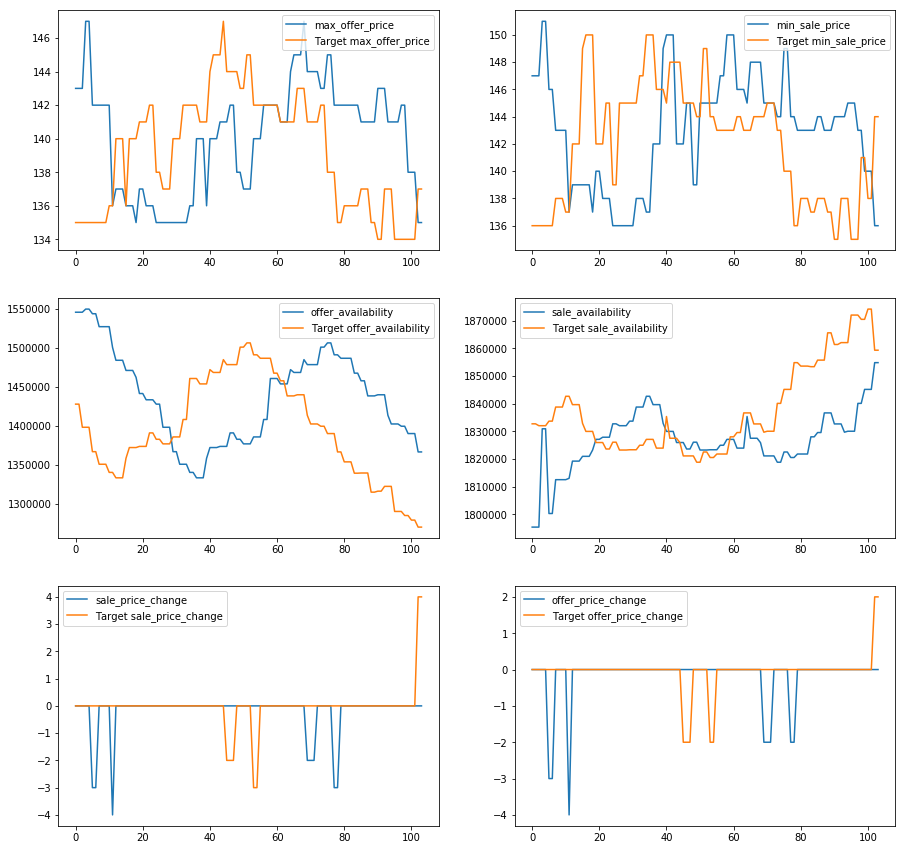

In [38]:
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.plot(Xtest[:,0], label=Xnames[0])
plt.plot(Ttest[:,0], label='Target ' + Tnames[0])
plt.legend();

plt.subplot(3,2,2)
plt.plot(Xtest[:,1], label=Xnames[1])
plt.plot(Ttest[:,1], label='Target ' + Tnames[1])
plt.legend();

plt.subplot(3,2,3)
plt.plot(Xtest[:,2], label=Xnames[2])
plt.plot(Ttest[:,2], label='Target ' + Tnames[2])
plt.legend();

plt.subplot(3,2,4)
plt.plot(Xtest[:,3], label=Xnames[3])
plt.plot(Ttest[:,3], label='Target ' + Tnames[3])
plt.legend();

plt.subplot(3,2,5)
plt.plot(Xtest[:,4], label=Xnames[4])
plt.plot(Ttest[:,4], label='Target ' + Tnames[4])
plt.legend();

plt.subplot(3,2,6)
plt.plot(Xtest[:,5], label=Xnames[5])
plt.plot(Ttest[:,5], label='Target ' + Tnames[5])
plt.legend();

## Methods

### Time-Embedding

In [39]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

In [40]:
def rollingWindows(X, windowSize=4):    
    nSamples, nAttributes = X.shape
    nWindows = nSamples - windowSize + 1
    # Shape of resulting matrix
    newShape = (nWindows, nAttributes * windowSize)
    itemSize = X.itemsize  # number of bytes
    # Number of bytes to increment to starting element in each dimension
    strides = (nAttributes * itemSize, itemSize)
    return np.lib.stride_tricks.as_strided(X, shape=newShape, strides=strides)

In [41]:
XtrainW = rollingWindows(Xtrain, windowSize=9)
XtestW = rollingWindows(Xtest, windowSize=9)
TtrainW = Ttrain[:XtrainW.shape[0]]
TtestW = Ttest[:XtestW.shape[0]]
XtrainW.shape, TtrainW.shape, XtestW.shape, TtestW.shape

((232, 54), (232, 6), (96, 54), (96, 6))

In [42]:
import pandas as pd
def getBestAvgNeuralStructure(Xtrain,Xtest,Ttrain,Ttest,nIterations=1000,timesToAvg=5,plot=False):
    errors = []
    hiddens = [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
    for hids in hiddens:
        errorTrain = 0
        errorTest = 0
        errorAvg = 0
        for _ in range(timesToAvg):
            nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
            nnet.train(Xtrain, Ttrain, nIterations)
            errorTrain += rmse(Ttrain[:,0:2], nnet.use(Xtrain)[:,0:2])
            errorTest += rmse(Ttest[:,0:2], nnet.use(Xtest)[:,0:2])
            errorAvg = (errorTrain + errorTest)/2
        errors.append([hids,errorTrain/timesToAvg,errorTest/timesToAvg,errorAvg/timesToAvg])
    errors = pd.DataFrame(errors)
    print(errors)
    if plot==True:
        plt.figure(figsize=(10, 10))
        plt.plot(errors.values[:, 1:], 'o-')
        plt.title('RMSE Values for Neural Net')
        plt.legend(('Train', 'Test', 'Avg Error'))
        plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
        plt.grid(True)
    minErrorAverage = errors[3].min()
    minIndex = list(errors[3]).index(minErrorAverage)
    bestHids = errors[0][minIndex]
    print('Lowest average error over',timesToAvg,'fully trained iterations:',bestHids,'with error:',minErrorAverage)
    return bestHids

In [44]:
netXtrain, netTtrain, netXtest, netTtest = makeItemData(allItems=True, splitData=True, stepsAheadToPredict=8)
netXtrain.shape, netTtrain.shape, netXtest.shape, netTtest.shape

((251, 6), (251, 6), (109, 6), (109, 6))

In [47]:
XtrainW = rollingWindows(netXtrain, windowSize=9)
XtestW = rollingWindows(netXtest, windowSize=9)
TtrainW = netTtrain[:XtrainW.shape[0]]
TtestW = netTtest[:XtestW.shape[0]]
XtrainW.shape, TtrainW.shape, XtestW.shape, TtestW.shape

((243, 54), (243, 6), (101, 54), (101, 6))

In [48]:
Xtrain[0,0:2]

array([137, 138])

                       0         1         2         3
0                    [1]  3.545910  3.316348  3.431129
1                 [1, 1]  3.544926  3.411496  3.478211
2              [1, 1, 1]  3.544179  3.472919  3.508549
3           [1, 1, 1, 1]  3.543798  3.494598  3.519198
4        [1, 1, 1, 1, 1]  3.567562  3.802133  3.684848
5                    [5]  0.182869  1.459652  0.821261
6                 [5, 5]  0.315711  2.972806  1.644259
7              [5, 5, 5]  0.356535  2.653949  1.505242
8           [5, 5, 5, 5]  0.357193  3.655602  2.006397
9        [5, 5, 5, 5, 5]  0.585319  5.052132  2.818726
10                  [10]  0.045706  2.097895  1.071800
11              [10, 10]  0.058574  3.419564  1.739069
12          [10, 10, 10]  0.052009  3.093678  1.572844
13      [10, 10, 10, 10]  0.070441  3.208489  1.639465
14  [10, 10, 10, 10, 10]  0.116097  4.338240  2.227168
15                  [20]  0.023877  2.256511  1.140194
16              [20, 20]  0.025484  2.907172  1.466328
17        

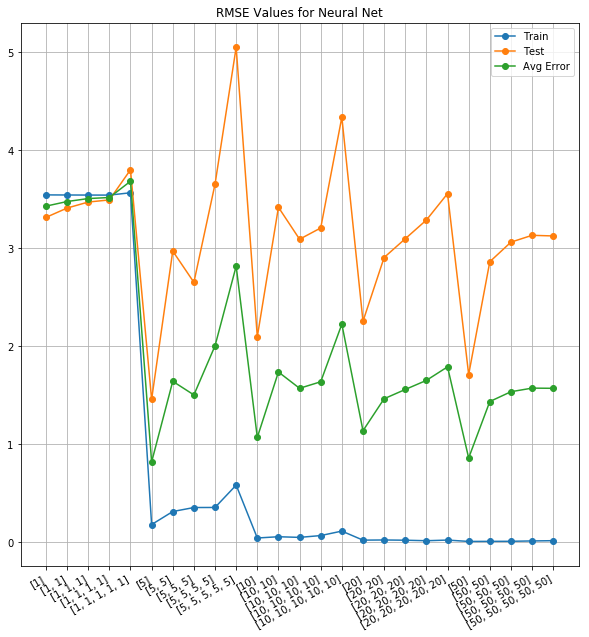

In [49]:
bestHids = getBestAvgNeuralStructure(XtrainW, XtestW, TtrainW, TtestW, 1000, plot=True)

In [53]:
def compareItemToMarket(itemID=19718, allItems=False, stepsAheadToPredict=8, windowSize=9):
    # get data
    if allItems:
        Xtrain, Ttrain, allItems = makeItemData(allItems=allItems, stepsAheadToPredict=stepsAheadToPredict) # training with all items
        Xtest, Ttest, itemTest = makeItemData(itemID, stepsAheadToPredict=stepsAheadToPredict)        
    else: 
        Xtrain, Ttrain, Xtest, Ttest = makeItemData(itemID, splitData=True, stepsAheadToPredict=stepsAheadToPredict)
        
    Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape
    
    # apply rolling windows to data
    XtrainW = rollingWindows(Xtrain, windowSize=windowSize)
    XtestW = rollingWindows(Xtest, windowSize=windowSize)
    TtrainW = Ttrain[:XtrainW.shape[0]]
    TtestW = Ttest[:XtestW.shape[0]]
    XtrainW.shape, TtrainW.shape, XtestW.shape, TtestW.shape
    
    # build and train net
    nnet = nn.NeuralNetwork(XtrainW.shape[1], bestHids, TtrainW.shape[1])
    nnet.train(XtrainW, TtrainW, 1000, verbose=True)

    fig = plt.figure(figsize=(15,15))
    plt.subplot(4,2,1)
    plt.plot(nnet.getErrors())
    print(nnet)

    Ytrain = nnet.use(XtrainW)
    Y = nnet.use(XtestW)

    plt.subplot(4,2,3)
    plt.plot(Y[:,0], label='Predicted ' + Tnames[0])
    plt.plot(TtestW[:,0], label='Target ' + Tnames[0])
    plt.legend();

    plt.subplot(4,2,4)
    plt.plot(Y[:,1], label='Predicted ' + Tnames[1])
    plt.plot(TtestW[:,1], label='Target ' + Tnames[1])
    plt.legend();

    plt.subplot(4,2,5)
    plt.plot(Y[:,2], label='Predicted ' + Tnames[2])
    plt.plot(TtestW[:,2], label='Target ' + Tnames[2])
    plt.legend();

    plt.subplot(4,2,6)
    plt.plot(Y[:,3], label='Predicted ' + Tnames[3])
    plt.plot(TtestW[:,3], label='Target ' + Tnames[3])
    plt.legend();

    plt.subplot(4,2,7)
    plt.plot(Y[:,4], label='Predicted ' + Tnames[4])
    plt.plot(TtestW[:,4], label='Target ' + Tnames[4])
    plt.legend();

    plt.subplot(4,2,8)
    plt.plot(Y[:,5], label='Predicted ' + Tnames[5])
    plt.plot(TtestW[:,5], label='Target ' + Tnames[5])
    plt.legend();

    print("")
    print("Final RMSEs")
    print(Tnames[0], " Train: ", rmse(Ytrain[:,0], TtrainW[:,0]), " Test: ", rmse(Y[:,0], TtestW[:,0]))
    print(Tnames[1], " Train: ", rmse(Ytrain[:,1], TtrainW[:,1]), " Test: ", rmse(Y[:,1], TtestW[:,1]))
    print(Tnames[2], " Train: ", rmse(Ytrain[:,2], TtrainW[:,2]), " Test: ", rmse(Y[:,2], TtestW[:,2]))
    print(Tnames[3], " Train: ", rmse(Ytrain[:,3], TtrainW[:,3]), " Test: ", rmse(Y[:,3], TtestW[:,3]))
    print(Tnames[4], " Train: ", rmse(Ytrain[:,4], TtrainW[:,4]), " Test: ", rmse(Y[:,4], TtestW[:,4]))
    print(Tnames[5], " Train: ", rmse(Ytrain[:,5], TtrainW[:,5]), " Test: ", rmse(Y[:,5], TtestW[:,5]))
    
    return Y

SCG: Iteration 100 fValue Eval 0.0332000838441 Scale 1e-15
SCG: Iteration 200 fValue Eval 0.0284034869666 Scale 1e-15
SCG: Iteration 300 fValue Eval 0.0267292759376 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.0263010949286 Scale 1e-15
SCG: Iteration 500 fValue Eval 0.0257496563002 Scale 1e-15
SCG: Iteration 600 fValue Eval 0.025619738495 Scale 1e-15
SCG: Iteration 700 fValue Eval 0.025575534466 Scale 1e-15
SCG: Iteration 800 fValue Eval 0.025489584953 Scale 1e-15
SCG: Iteration 900 fValue Eval 0.0253213296316 Scale 1e-15
SCG: Iteration 1000 fValue Eval 0.0252873715567 Scale 1e-15
NeuralNetwork(54, [5], 6)
   Network was trained for 1001 iterations that took 0.9220 seconds. Final error is 0.15902003507944343.

Final RMSEs
max_offer_price  Train:  0.490100843468  Test:  0.490110189913
min_sale_price  Train:  0.157492025701  Test:  0.157491284423
offer_availability  Train:  4621.97788332  Test:  4621.92753186
sale_availability  Train:  3060.80615266  Test:  3060.86711761
sale_price_chang

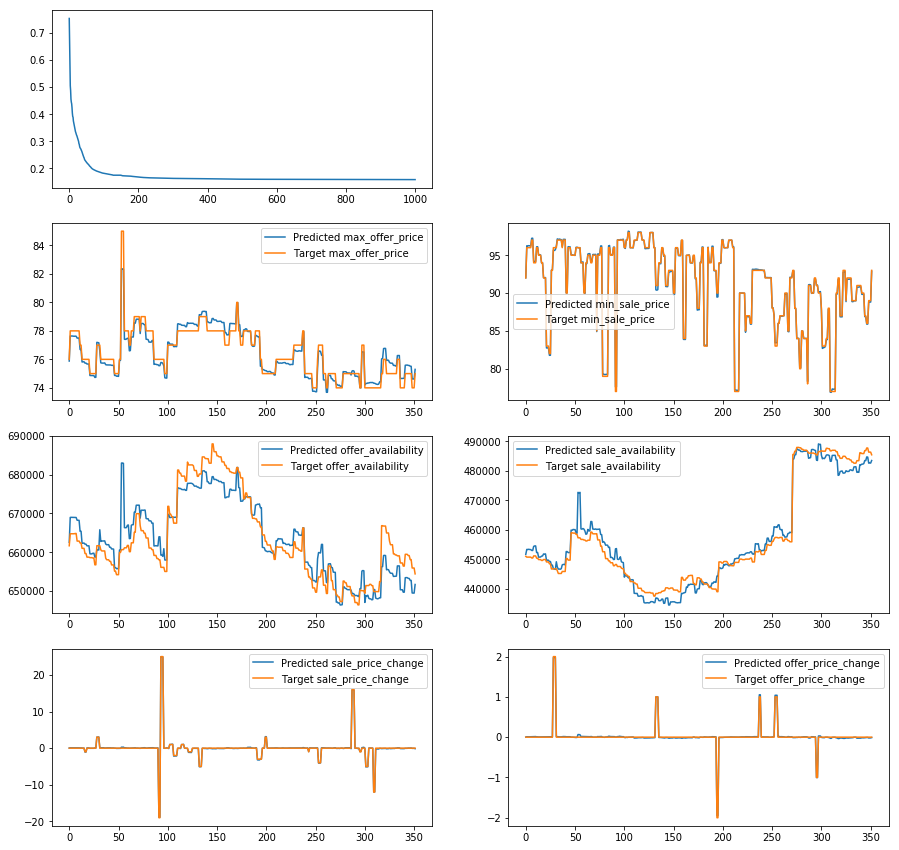

In [54]:
Yall = compareItemToMarket(itemID=19718, allItems=True)

SCG: Iteration 100 fValue Eval 0.0272266771181 Scale 1e-15
SCG: Iteration 200 fValue Eval 0.0167018844221 Scale 1e-15
SCG: Iteration 300 fValue Eval 0.0151714250786 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.0146539397202 Scale 1e-15
SCG: Iteration 500 fValue Eval 0.0141776219651 Scale 1e-15
SCG: Iteration 600 fValue Eval 0.0141018067612 Scale 1e-15
SCG: Iteration 700 fValue Eval 0.0140272402073 Scale 1e-15
SCG: Iteration 800 fValue Eval 0.0139701574085 Scale 1e-15
SCG: Iteration 900 fValue Eval 0.0138086814237 Scale 1e-15
SCG: Iteration 1000 fValue Eval 0.0137631141316 Scale 1e-15
NeuralNetwork(54, [5], 6)
   Network was trained for 1001 iterations that took 0.9323 seconds. Final error is 0.1173162995138035.

Final RMSEs
max_offer_price  Train:  0.234050321194  Test:  1.24928908479
min_sale_price  Train:  0.126558089509  Test:  0.728591475294
offer_availability  Train:  2864.91426692  Test:  15013.8191922
sale_availability  Train:  1369.72371663  Test:  17053.8578054
sale_price_chan

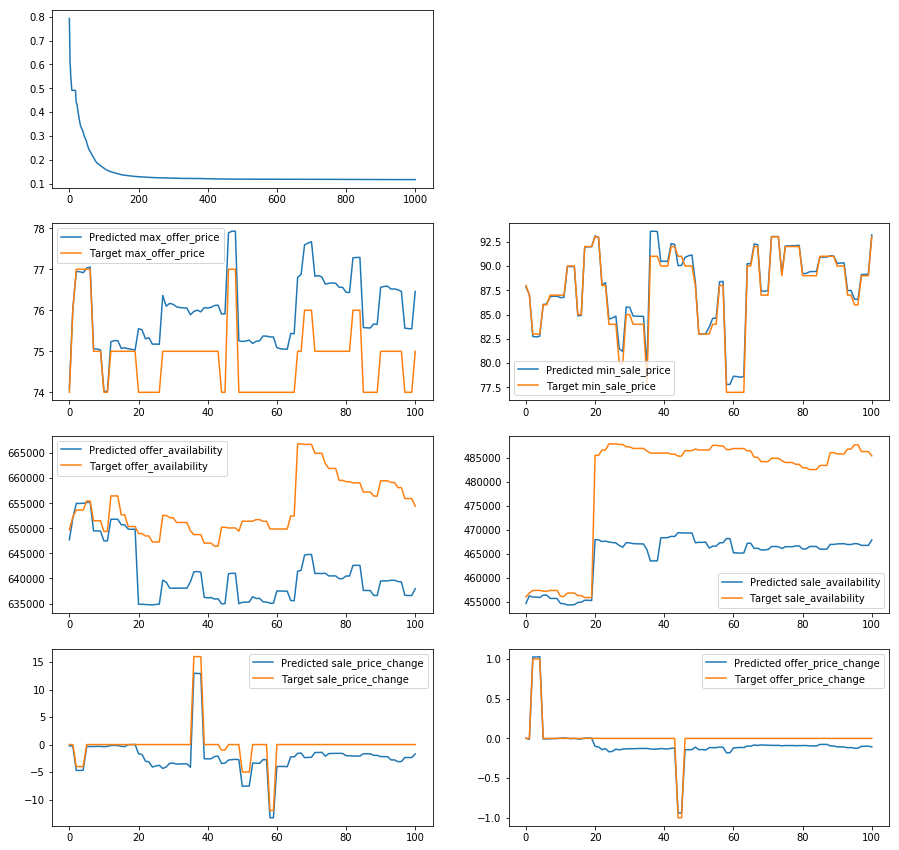

In [52]:
Y = compareItemToMarket(itemID=19718, allItems=False)

In [357]:
np.savetxt('boltOfGossamerPrediction.txt', boltOfGossamerPredict[-2:,:])

SCG: Iteration 200 fValue Eval 0.00070361598844 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.000265358157278 Scale 1e-15
SCG: Iteration 600 fValue Eval 0.000157604835674 Scale 1e-15
SCG: Iteration 800 fValue Eval 0.000118540027238 Scale 1e-15
SCG: Iteration 1000 fValue Eval 9.12597140512e-05 Scale 1e-15
SCG: Iteration 1200 fValue Eval 7.58862150096e-05 Scale 1e-15
SCG: Iteration 1400 fValue Eval 6.93519371813e-05 Scale 1e-15
SCG: Iteration 1600 fValue Eval 6.04289325907e-05 Scale 1e-15
SCG: Iteration 1800 fValue Eval 4.76083234205e-05 Scale 1e-15
SCG: Iteration 2000 fValue Eval 4.32712911477e-05 Scale 1e-15
NeuralNetwork(54, [10], 6)
   Network was trained for 2001 iterations that took 3.9497 seconds. Final error is 0.006578091755799212.

Final RMSEs
max_offer_price  Train:  0.0165180584968  Test:  0.888113988231
min_sale_price  Train:  0.0420816099872  Test:  2.9654112996
offer_availability  Train:  95.7479493599  Test:  3826.47993817
sale_availability  Train:  42.3173027827  Test:  1

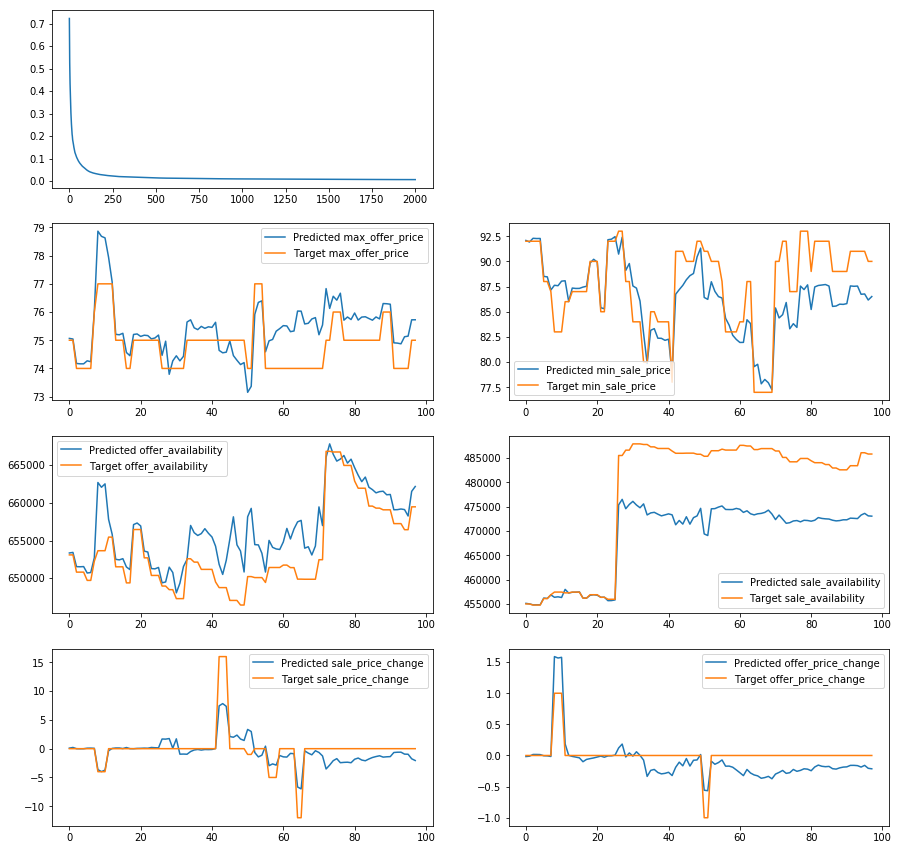

In [348]:
juteScrapPredict = compareItemToMarket(itemID=19718, allItems=False)

SCG: Iteration 200 fValue Eval 0.000763993440802 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.000217107281691 Scale 1e-15
SCG: Iteration 600 fValue Eval 0.000112453724665 Scale 1e-15
SCG: Iteration 800 fValue Eval 7.74831168638e-05 Scale 1e-15
SCG: Iteration 1000 fValue Eval 5.17461688988e-05 Scale 1e-15
SCG: Iteration 1200 fValue Eval 4.03591204621e-05 Scale 1e-15
SCG: Iteration 1400 fValue Eval 3.61864793758e-05 Scale 1e-15
SCG: Iteration 1600 fValue Eval 2.98093208588e-05 Scale 1e-15
SCG: Iteration 1800 fValue Eval 2.37218777445e-05 Scale 1e-15
SCG: Iteration 2000 fValue Eval 2.11232385358e-05 Scale 1e-15
NeuralNetwork(54, [10], 6)
   Network was trained for 2001 iterations that took 4.1283 seconds. Final error is 0.004596002451670104.

Final RMSEs
max_offer_price  Train:  0.0295846077545  Test:  0.478667937533
min_sale_price  Train:  0.0611957287859  Test:  0.704194572983
offer_availability  Train:  59.8173199491  Test:  381.895047127
sale_availability  Train:  10.691364074  Test: 

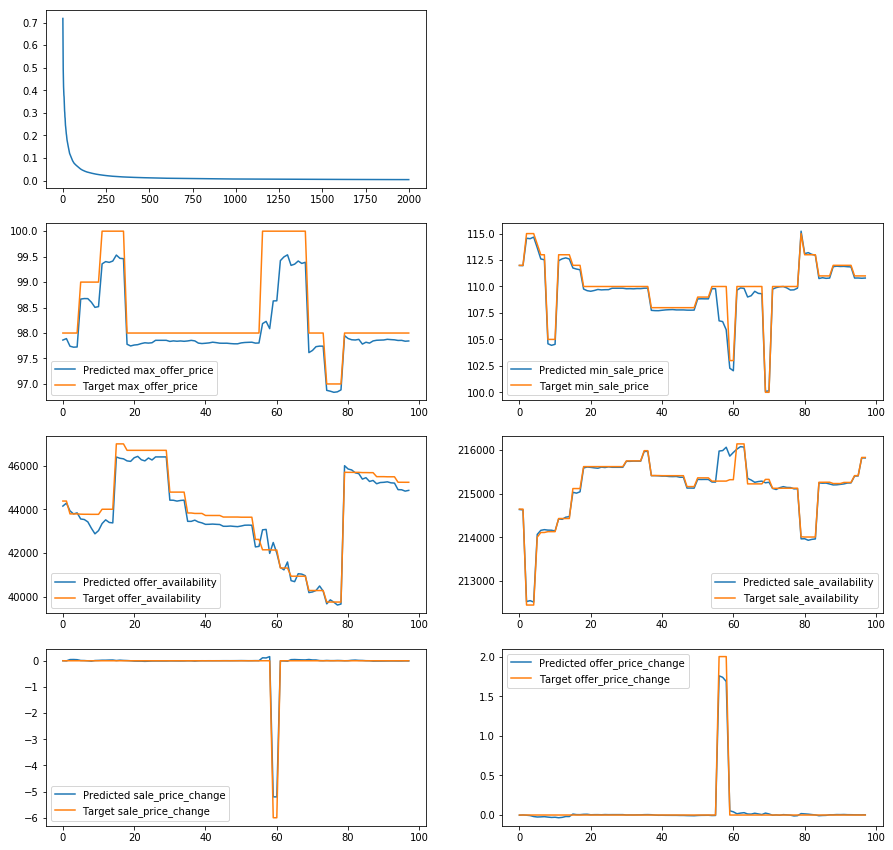

In [350]:
goldIngotPredict = compareItemToMarket(itemID=19682, allItems=False)

SCG: Iteration 200 fValue Eval 0.000427110431353 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.000134748454799 Scale 1e-15
SCG: Iteration 600 fValue Eval 7.59283193334e-05 Scale 1e-15
SCG: Iteration 800 fValue Eval 5.65236149184e-05 Scale 1e-15
SCG: Iteration 1000 fValue Eval 3.64876197713e-05 Scale 1e-15
SCG: Iteration 1200 fValue Eval 2.92135587723e-05 Scale 1e-15
SCG: Iteration 1400 fValue Eval 2.71319714216e-05 Scale 1e-15
SCG: Iteration 1600 fValue Eval 2.39137782528e-05 Scale 1e-15
SCG: Iteration 1800 fValue Eval 1.96522523355e-05 Scale 1e-15
SCG: Iteration 2000 fValue Eval 1.76296809724e-05 Scale 1e-15
NeuralNetwork(54, [10], 6)
   Network was trained for 2001 iterations that took 4.0169 seconds. Final error is 0.004198771364621666.

Final RMSEs
max_offer_price  Train:  0.0793025557688  Test:  9.75230149985
min_sale_price  Train:  0.109438790481  Test:  13.7288991364
offer_availability  Train:  7.56857020355  Test:  880.137653366
sale_availability  Train:  15.2312475693  Test:  1

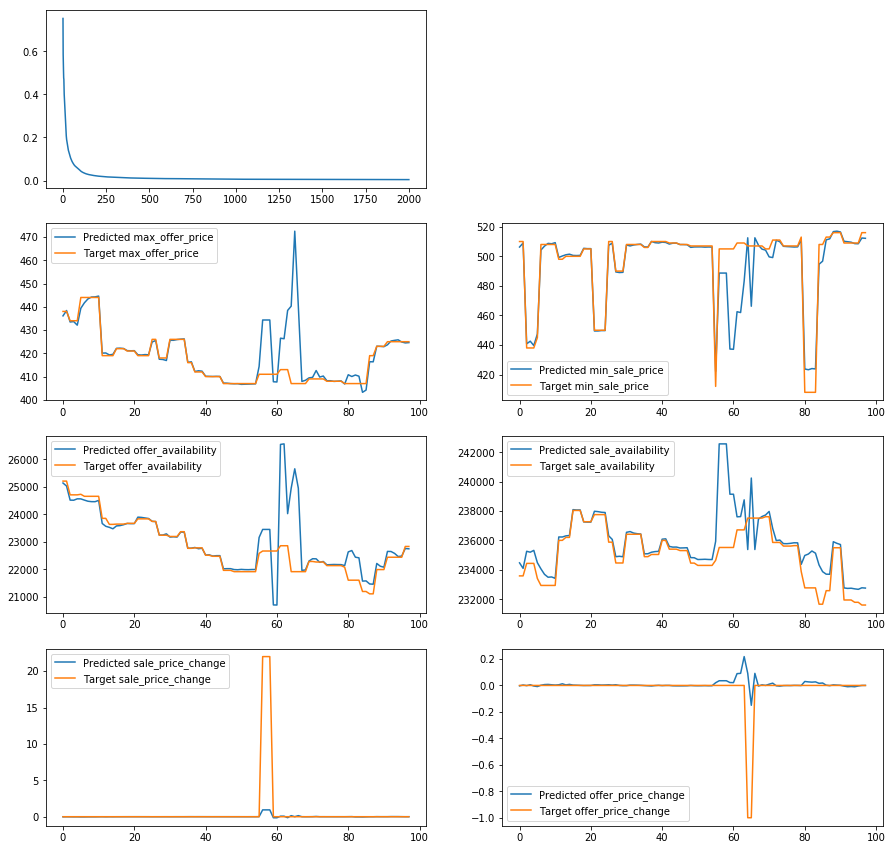

In [351]:
hardWoodPlank = compareItemToMarket(itemID=19711, allItems=False)

SCG: Iteration 200 fValue Eval 0.000332213274983 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.000111056279444 Scale 1e-15
SCG: Iteration 600 fValue Eval 6.14267140167e-05 Scale 1e-15
SCG: Iteration 800 fValue Eval 4.30669668477e-05 Scale 1e-15
SCG: Iteration 1000 fValue Eval 2.78703207878e-05 Scale 1e-15
SCG: Iteration 1200 fValue Eval 2.25199095447e-05 Scale 1e-15
SCG: Iteration 1400 fValue Eval 2.0722471926e-05 Scale 1e-15
SCG: Iteration 1600 fValue Eval 1.81724783977e-05 Scale 1e-15
SCG: Iteration 1800 fValue Eval 1.48170321239e-05 Scale 1e-15
SCG: Iteration 2000 fValue Eval 1.33083970997e-05 Scale 1e-15
NeuralNetwork(54, [10], 6)
   Network was trained for 2001 iterations that took 4.1994 seconds. Final error is 0.0036480675843050983.

Final RMSEs
max_offer_price  Train:  0.0089517196834  Test:  1.27071407034
min_sale_price  Train:  0.0220958971146  Test:  2.12173590582
offer_availability  Train:  11.8298821741  Test:  2714.10493263
sale_availability  Train:  140.152217841  Test:  

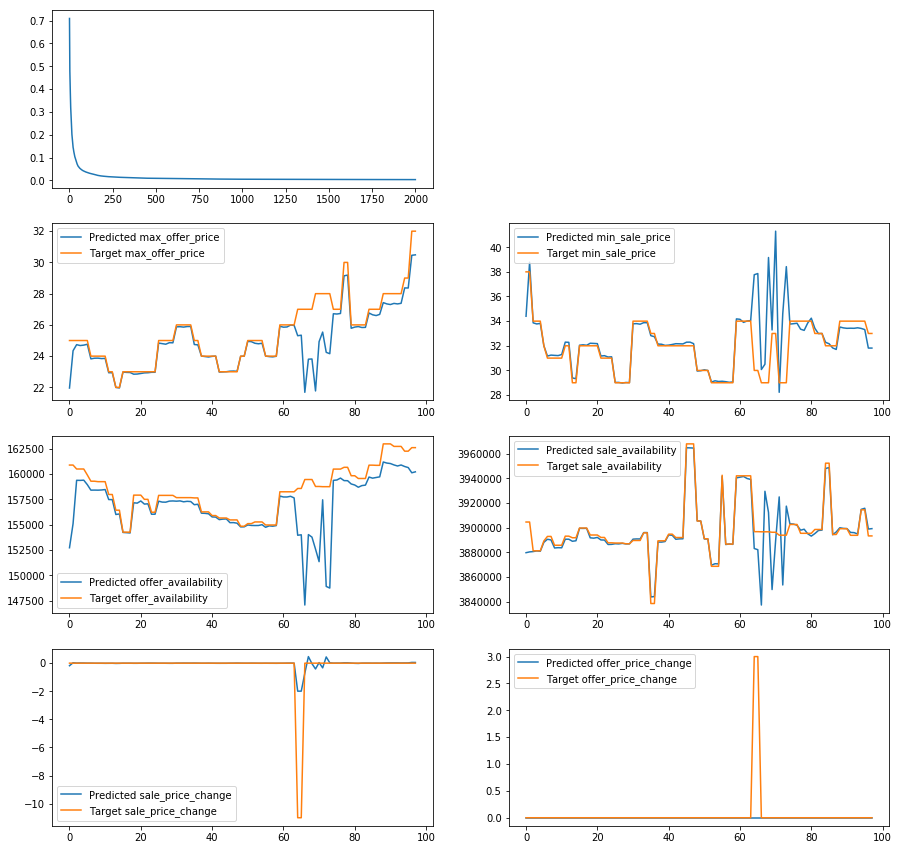

In [352]:
boltOfGossamerPredict = compareItemToMarket(itemID=19746, allItems=False)

In [139]:
def compareAllToMarket():
    compareTrainX,compareTrainT,items = makeItemData(allItems=True,stepsAheadToPredict=8)
    
    compareTrainX = rollingWindows(compareTrainX, windowSize=9)
    compareTrainT = rollingWindows(compareTrainT, windowSize=9)
    
    nnet = nn.NeuralNetwork(compareTrainX.shape[1], bestHids, compareTrainT.shape[1])
    nnet.train(compareTrainX, compareTrainT, 2000)
    print(nnet)

    allErrors = [Xnames]
    i = 0
    for id in itemIDs:   
        Xtest, Ttest, item1 = makeItemData(id, stepsAheadToPredict=8)
        if i == 0:
            print(Xtest[0])
            i = 1
        XtestW = rollingWindows(Xtest, windowSize=9)
        TtestW = Ttest[:XtestW.shape[0]]

        Y = nnet.use(XtestW)
        allErrors.append([rmse(Y[:,0], TtestW[:,0]), rmse(Y[:,1], TtestW[:,1]), rmse(Y[:,2], TtestW[:,2]), rmse(Y[:,3], TtestW[:,3]), rmse(Y[:,4], TtestW[:,4]), rmse(Y[:,5], TtestW[:,5])])
    allErrors = pd.DataFrame(allErrors)
    lowestErrors = np.amin(allErrors, axis=0)
        
    return (allErrors, lowestErrors)

NeuralNetwork(54, [5], 54)
   Network was trained for 2001 iterations that took 2.5940 seconds. Final error is 0.49155108398238573.
[    77     92 664614 451649      0      0]
                  0               1                   2                  3  \
0   max_offer_price  min_sale_price  offer_availability  sale_availability   
1          0.906064         2.64972             2744.58            4637.54   
2           70.3538         120.246              461681             380895   
3           6.12178         14.4009         1.03548e+06             635086   
4           21.2542         57.0767              602066             369238   
5           8.00621         15.1505         2.61841e+06             193693   
6           69.1354         89.5165              521321             395543   
7           54.5976         47.4886               57300        3.61169e+06   
8           23.5673         14.6734              574159             258449   
9           181.584          174.03         

array([[  8.02621682e+01,   1.09184971e+02,   6.58154251e+05,
          5.36923068e+05,  -9.22786661e+00,  -3.67787066e-01],
       [  8.00079924e+01,   1.09303970e+02,   6.56804028e+05,
          5.38565997e+05,  -9.59641153e+00,  -3.88982679e-01],
       [  8.00078943e+01,   1.09303944e+02,   6.56803468e+05,
          5.38566555e+05,  -9.59639882e+00,  -3.88979956e-01],
       ..., 
       [  8.14843298e+01,   1.08643758e+02,   6.64663974e+05,
          5.29054143e+05,  -7.52220129e+00,  -2.70599229e-01],
       [  8.14670442e+01,   1.08651673e+02,   6.64572048e+05,
          5.29165707e+05,  -7.54688901e+00,  -2.72013770e-01],
       [  7.99691130e+01,   1.09337376e+02,   6.56606037e+05,
          5.38832844e+05,  -9.68571835e+00,  -3.94562166e-01]])

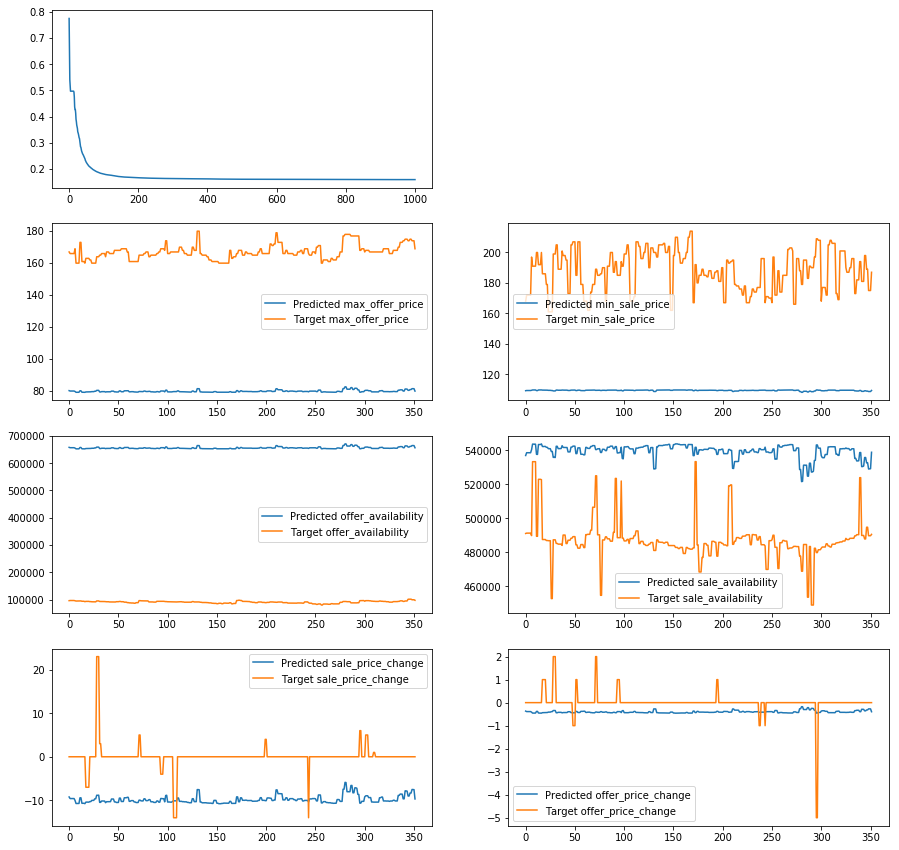

In [140]:
allErrors, lowestErrors = compareAllToMarket()
print(allErrors)
compareItemToMarket(itemID=19725, allItems=True, stepsAheadToPredict=8, windowSize=9)


## Results

For some reason, giving a window size of 1 timepoint larger than the steps ahead to predict gives best accuracy

## Conclusions

## References

## Word Count

In [1340]:
import io
from IPython.nbformat import current
import glob
nbfile = glob.glob('TermProject.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file TermProject.ipynb is 63
